In [1]:
import py4cytoscape as p4c
import pandas as pd
from sklearn.metrics import roc_curve
from IPython.display import Image, display
p4c.cytoscape_ping()
p4c.cytoscape_version_info()

You are connected to Cytoscape!


{'apiVersion': 'v1',
 'cytoscapeVersion': '3.10.3',
 'automationAPIVersion': '1.12.0',
 'py4cytoscapeVersion': '1.12.0'}

In [2]:
df_predictions = pd.read_csv('../results/test_results/atopic_dermatitis/atopic_dermatitis_test_prediction_results.tsv', sep='\t')
fpr, tpr, thresholds = roc_curve(df_predictions['true_label'], df_predictions['predicted_score'])
threshold = thresholds[fpr <= 0.05][-1]
protein_list = df_predictions[df_predictions['predicted_score'] >= threshold]['protein'].unique() 
protein_string = ",".join(protein_list)

### make the network and do clustering

In [ ]:
species = "Homo sapiens"  # or "Mus musculus" for mouse
networktype = 'full STRING network' # or physical subnetwork
# networktype = 'physical subnetwork'
cutoff = "0.7"
inflation_parameter = 4

network_name = "My Network Name yyy"
collection_name = "My Folder2"

command = (f'string protein query '
            f'query="{protein_string}" '
            f'species="{species}" '
            f'cutoff="{cutoff}" '
            f'networkType="{networktype}" '
            f'limit="0" '
            f'newNetName="{network_name}" ')
suid = p4c.commands_post(command)


cluster_cmd = (f'cluster mcl '
               f'network="{suid}" '
               f'inflation_parameter="{inflation_parameter}"')
cluster_result = p4c.commands_post(cluster_cmd)      

AttributeError: module 'py4cytoscape' has no attribute 'command_run'

In [16]:
p4c.commands_help('string protein query')

['cutoff',
 'includesViruses',
 'limit',
 'networkType',
 'newNetName',
 'query',
 'showFlatNodeDesign',
 'showGlassBallEffect',
 'showSTRINGstyleLabels',
 'showStructureImages',
 'species',
 'taxonID']

In [15]:
p4c.collections.get_collection_list()

['STRING network - My Network Name yyy ',
 'STRING network - My Network Name xxx',
 'STRING network - My Network Name yyy']

In [10]:
p4c.commands_run(f'network set attribute namespace="{collection_name}"')

In commands_get(): Failed: Cannot invoke "java.util.Map.size()" because "valueMap" is null


CyError: In commands_get(): Failed: Cannot invoke "java.util.Map.size()" because "valueMap" is null

In [4]:
cluster1_proteins = [node_dict['name'] for node_dict in cluster_result['clusters'][0]['nodes']]
cluster2_proteins = [node_dict['name'] for node_dict in cluster_result['clusters'][1]['nodes']]

In [5]:
import requests ## python -m pip install requests 
import json

def string_enrichment_api(protein_list):
    string_api_url = "https://version-12-0.string-db.org/api"
    output_format = "json"
    method = "enrichment"

    request_url = "/".join([string_api_url, output_format, method])

    params = {

        "identifiers" : "%0d".join(protein_list), # your protein
        "species" : 9606, # NCBI/STRING taxon identifier 
        "caller_identity" : "deweihu_ucph" # your app name
    }

    response = requests.post(request_url, data=params)

    data = json.loads(response.text)
    
    return data

In [6]:
data = string_enrichment_api(cluster1_proteins)
print('Term\tFDR\tDescription\tNum of Genes\tNum of Genes in Background')
for row in data:

    term = row["term"]
    preferred_names = ",".join(row["preferredNames"])
    fdr = float(row["fdr"])
    description = row["description"]
    category = row["category"]
    num_genes = row['number_of_genes']
    num_genes_background = row['number_of_genes_in_background']

    if category == "Process" and fdr < 0.01:

        ## print significant GO Process annotations
        print("\t".join([term, str(fdr), description, str(num_genes), str(num_genes_background)]))

Term	FDR	Description	Num of Genes	Num of Genes in Background
GO:0006955	9.62e-63	Immune response	67	1321
GO:0019221	1.02e-55	Cytokine-mediated signaling pathway	47	369
GO:0002376	1.2e-51	Immune system process	68	2121
GO:0071345	2.44e-48	Cellular response to cytokine stimulus	50	711
GO:0034097	1.57e-47	Response to cytokine	51	804
GO:0006954	5.64e-44	Inflammatory response	44	538
GO:0006952	6.66e-42	Defense response	55	1394
GO:0007166	4.81e-36	Cell surface receptor signaling pathway	57	2040
GO:0002684	5.39e-34	Positive regulation of immune system process	43	874
GO:0071310	1.11e-33	Cellular response to organic substance	55	2019
GO:0051707	3.31e-33	Response to other organism	48	1328
GO:0044419	2.3e-32	Biological process involved in interspecies interaction between organisms	49	1490
GO:0009605	1.14e-31	Response to external stimulus	56	2355
GO:0048584	3.98e-30	Positive regulation of response to stimulus	53	2131
GO:0010033	6.55e-30	Response to organic substance	57	2692
GO:0007165	1.04e-29	Sign

In [7]:
target_row1 = [row for row in data if row['term'] == 'GO:0070098' and row['category'] == 'Process'][0]

In [8]:
# make a plot with the new genes: target_row['inputGenes']
inputGenes = target_row1['inputGenes']
query_string = ",".join(inputGenes)
command = (f'string protein query '
            f'query="{query_string}" '
            f'species="{species}" '
            f'cutoff="{cutoff}" '
            f'networkType="{networktype}" '
            f'limit="0"')
suid = p4c.commands_post(command)

In [9]:
inputGenes

['9606.ENSP00000219235',
 '9606.ENSP00000219244',
 '9606.ENSP00000225831',
 '9606.ENSP00000246657',
 '9606.ENSP00000249887',
 '9606.ENSP00000302234',
 '9606.ENSP00000305651',
 '9606.ENSP00000306512',
 '9606.ENSP00000332504',
 '9606.ENSP00000332659',
 '9606.ENSP00000343952',
 '9606.ENSP00000349967',
 '9606.ENSP00000351671',
 '9606.ENSP00000378365',
 '9606.ENSP00000379110',
 '9606.ENSP00000400533',
 '9606.ENSP00000416996',
 '9606.ENSP00000441600',
 '9606.ENSP00000474412',
 '9606.ENSP00000477908',
 '9606.ENSP00000479955']

In [15]:
data = string_enrichment_api(cluster2_proteins)
print('Term\tFDR\tDescription\tNum of Genes\tNum of Genes in Background')
for row in data:

    term = row["term"]
    preferred_names = ",".join(row["preferredNames"])
    fdr = float(row["fdr"])
    description = row["description"]
    category = row["category"]
    num_genes = row['number_of_genes']
    num_genes_background = row['number_of_genes_in_background']

    if category == "Process" and fdr < 0.01:

        ## print significant GO Process annotations
        print("\t".join([term, str(fdr), description, str(num_genes), str(num_genes_background)]))

Term	FDR	Description	Num of Genes	Num of Genes in Background
GO:0030216	1.92e-26	Keratinocyte differentiation	15	138
GO:0031424	1.92e-26	Keratinization	14	83
GO:0043588	1.76e-25	Skin development	16	266
GO:0008544	1.86e-24	Epidermis development	16	320
GO:0060429	2.3e-16	Epithelium development	16	1069
GO:0018149	3.27e-07	Peptide cross-linking	5	37
GO:0032501	0.00024	Multicellular organismal process	16	6490
GO:0061436	0.0023	Establishment of skin barrier	3	28


In [17]:
# get the proteins where GO term is GO:0070098
target_row2 = [row for row in data if row['term'] == 'GO:0031424' and row['category'] == 'Process'][0]

In [18]:
# make a plot with the new genes: target_row['inputGenes']
inputGenes = target_row2['inputGenes']
query_string = ",".join(inputGenes)
command = (f'string protein query '
            f'query="{query_string}" '
            f'species="{species}" '
            f'cutoff="{cutoff}" '
            f'networkType="{networktype}" '
            f'limit="0"')
suid = p4c.commands_post(command)

In [9]:
p4c.import_visual_styles('../data/Revelen_style.xml')  # Adjust the path to your visual style XML file

['Revelen']

In [25]:
available_styles = p4c.get_visual_style_names()
print("Available styles:", available_styles)

Available styles: ['BioPAX', 'Universe', 'Directed', 'default black', 'Sample3', 'Marquee', 'BioPAX_SIF', 'Ripple', 'Revelen', 'Nested Network Style', 'Sample2', 'Solid', 'STRING - 1', 'Curved', 'default', 'size_rank', 'Gradient1', 'Sample1', 'Big Labels', 'Minimal', 'STRING - 2', 'STRING']


In [10]:
p4c.set_visual_style('Revelen') 

{'message': 'Visual Style applied.'}

In [11]:
node_categories = {
 '9606.ENSP00000219235': 'gold_standard',
 '9606.ENSP00000219244': 'highly_ranked',
 '9606.ENSP00000225831': 'gold_standard',
 '9606.ENSP00000246657': 'highly_ranked',
 '9606.ENSP00000249887': 'gold_standard',
 '9606.ENSP00000302234': 'novel_candidate',
 '9606.ENSP00000305651': 'integrated',
 '9606.ENSP00000306512': 'novel_candidate',
 '9606.ENSP00000332504': 'integrated',
 '9606.ENSP00000332659': 'novel_candidate',
 '9606.ENSP00000343952': 'gold_standard',
 '9606.ENSP00000349967': 'highly_ranked',
 '9606.ENSP00000351671': 'highly_ranked',
 '9606.ENSP00000378365': 'integrated',
 '9606.ENSP00000379110': 'gold_standard',
 '9606.ENSP00000400533': 'integrated',
 '9606.ENSP00000416996': 'gold_standard',
 '9606.ENSP00000441600': 'highly_ranked',
 '9606.ENSP00000474412': 'gold_standard',
 '9606.ENSP00000477908': 'novel_candidate',
 '9606.ENSP00000479955': 'integrated'
}

category_df = pd.DataFrame(list(node_categories.items()), columns=['name', 'category'])

# Add the category column to your network
# Load the data into the node table
p4c.load_table_data(category_df, data_key_column='name', table='node')

'Success: Data loaded in defaultnode table'

In [33]:
color_mapping = {
    'gold_standard': '#FF6B35',      # Orange
    'highly_ranked': '#20B2AA',      # Teal  
    'novel_candidate': '#D3D3D3',    # Light gray
    'integrated': '#FFFFFF'               # White
}

# Apply the color mapping using correct function name
p4c.map_visual_property('node fill color', 
                       'category', 
                       'discrete',
                       color_mapping)

{'mappingType': 'discrete',
 'mappingColumn': 'category',
 'mappingColumnType': 'String',
 'visualProperty': 'NODE_FILL_COLOR',
 'map': []}

In [13]:
# Method 1: Direct discrete mapping
from IPython.display import Image, display
# p4c.set_node_color_mapping(
#     table_column='category',
#     table_column_values=['gold_standard', 'highly_ranked', 'novel_candidate', 'integrated'],
#     colors=['#FF6B35', '#20B2AA', '#D3D3D3', '#FFFFFF'],
#     mapping_type='d'
# )

# print("Applied discrete color mapping")

# # Export and display
# p4c.export_image('network_with_set_node_color.png', type='PNG', resolution=300)


# display(Image('network_with_set_node_color.png'))

✓ Pie charts applied


✓ Pie charts applied to novel candidate nodes


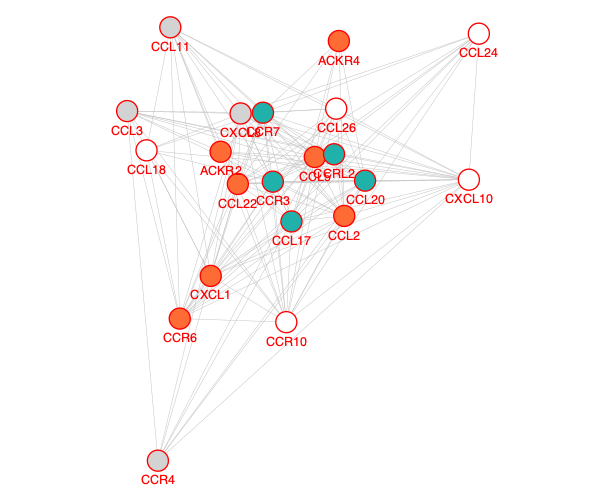

In [14]:
# p4c.set_node_custom_pie_chart(
#     columns=['value1', 'value2'],
#     colors=['#FF6B35', '#20B2AA'],  # Orange and teal for the split
#     style_name='Revelen'
# )
# print("✓ Pie charts applied")

p4c.set_node_color_mapping(
    table_column='category',
    table_column_values=['gold_standard', 'highly_ranked', 'novel_candidate', 'integrated'],
    colors=['#FF6B35', '#20B2AA', '#D3D3D3', '#FFFFFF'],
    mapping_type='d',
    style_name='Revelen'
)

p4c.set_visual_style('Revelen')
novel_candidate_nodes = ['9606.ENSP00000332659',
'9606.ENSP00000306512',
'9606.ENSP00000477908',
'9606.ENSP00000302234']

# Apply pie charts specifically to novel candidate nodes
try:
    # First, apply the pie chart to specific nodes
    p4c.set_node_custom_pie_chart(
        columns=['value1', 'value2'],
        colors=['#FF6B35', '#20B2AA'],
        style_name='Revelen',
        slot=1  # Use slot 1 for custom graphics
    )
    
    # Then use property bypass to ensure only novel candidates show pie charts
    for node in novel_candidate_nodes:
        p4c.set_node_property_bypass(node, 'NODE_CUSTOMGRAPHICS_1', 'org.cytoscape.ding.customgraphics.charts.pie.PieChartFactory')
        
    print("✓ Pie charts applied to novel candidate nodes")
    
except Exception as e:
    print(f"Custom pie chart method failed: {e}")

# novel_candidate_nodes = ['CCL3','CCL24']

# Alternative approach: Use custom graphics with manual pie chart
# Alternative approach: Use custom graphics with manual pie chart
# try:
#     # Set custom graphics to pie chart mode
#     for node in novel_candidate_nodes:
#         p4c.set_node_property_bypass(node, 'NODE_CUSTOMGRAPHICS_1', 'piechart')
        
#     print("✓ Set custom graphics to pie chart mode")
    
# except Exception as e:
#     print(f"Custom graphics method failed: {e}")



# Export and display
p4c.export_image('new_network_revelen_colored.png', type='PNG', resolution=300,overwrite_file=True)


display(Image('new_network_revelen_colored.png'))

In [15]:
# Try applying pie charts AFTER other mappings
p4c.set_node_color_mapping(
    table_column='category',
    table_column_values=['gold_standard', 'highly_ranked', 'integrated'],
    colors=['#FF6B35', '#20B2AA', '#FFFFFF'],
    mapping_type='d',
    style_name='Revelen'
)

# Apply pie charts after color mapping
# p4c.set_node_custom_pie_chart(
#     columns=['value1', 'value2'],
#     colors=['#FF6B35', '#20B2AA'],
#     style_name='Revelen'
# )

# Then apply to specific nodes
for node in novel_candidate_nodes:
    p4c.set_node_property_bypass(node, 'NODE_CUSTOMGRAPHICS_1', 'piechart')

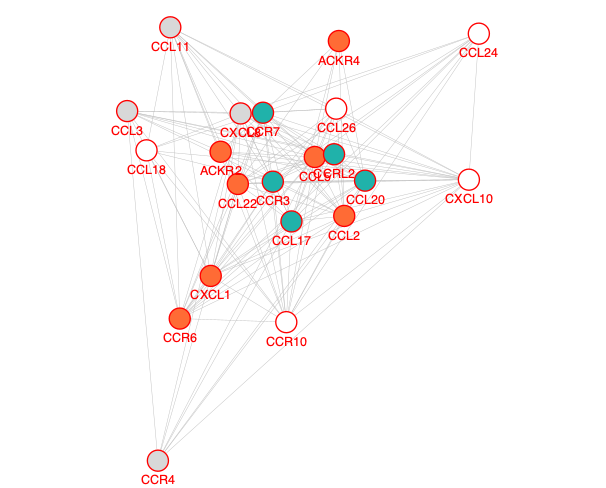

In [16]:
p4c.set_node_custom_pie_chart(["value1", "value2"], slot=1, style_name='Revelen')
for node in novel_candidate_nodes:
    p4c.set_node_property_bypass(node, 'NODE_CUSTOMGRAPHICS_1', 'piechart')
p4c.notebook_export_show_image()

Found 21 nodes
Direct start angle property not available, using alternative method
Direct start angle property not available, using alternative method
Direct start angle property not available, using alternative method
Direct start angle property not available, using alternative method
Style-based approach failed: set_visual_property_default() got multiple values for argument 'style_name'
Applied pie charts to 4 novel candidate nodes


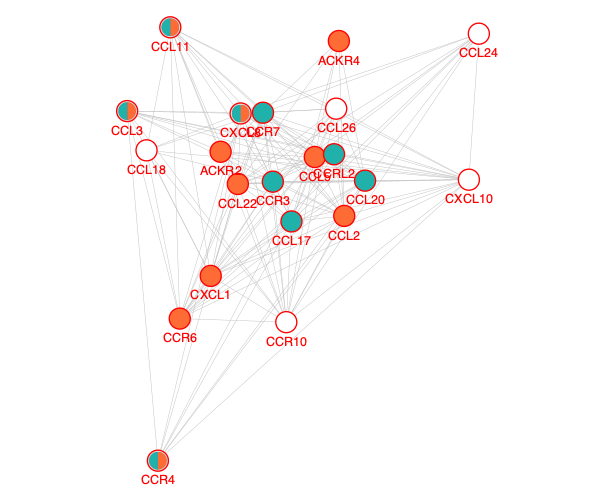

In [18]:
# First, create data columns for the pie chart
import pandas as pd
import py4cytoscape as p4c

# Create pie chart data for novel candidate nodes
novel_candidate_nodes = ['9606.ENSP00000332659', '9606.ENSP00000306512', 
                        '9606.ENSP00000477908', '9606.ENSP00000302234']

# Get all node names using the correct method
try:
    # Get the node table data
    node_table = p4c.get_table_data('node')
    all_nodes = node_table['name'].tolist()
except:
    # Alternative method if get_table_data doesn't work
    all_nodes = p4c.get_all_nodes()

print(f"Found {len(all_nodes)} nodes")

# Create a dataframe with pie chart values
pie_data = []
for node in all_nodes:
    if node in novel_candidate_nodes:
        # For novel candidates, create pie chart data (e.g., 50% each category)
        pie_data.append({'name': node, 'value1': 50, 'value2': 50})
    else:
        # For other nodes, set to 0 so they don't show pie charts
        pie_data.append({'name': node, 'value1': 0, 'value2': 0})

pie_df = pd.DataFrame(pie_data)

# Load the pie chart data
p4c.load_table_data(pie_df, data_key_column='name', table='node')

# Set up the pie chart with start angle from top (270 degrees or -90 degrees)
p4c.set_node_custom_pie_chart(
    columns=['value1', 'value2'], 
    colors=['#FF6B35', '#20B2AA'],  # Orange and teal
    slot=1, 
    style_name='Revelen',
    start_angle=270  # This sets the start position to the top (12 o'clock)
)

# Alternative approach if the above doesn't work - set properties individually
for node in novel_candidate_nodes:
    # Apply the pie chart custom graphics
    p4c.set_node_property_bypass(node, 'NODE_CUSTOMGRAPHICS_1', 
                                'org.cytoscape.ding.customgraphics.charts.pie.PieChartFactory')
    
    # Set the start angle property directly (if supported)
    try:
        p4c.set_node_property_bypass(node, 'NODE_CUSTOMGRAPHICS_1_START_ANGLE', 270)
    except:
        print("Direct start angle property not available, using alternative method")

# If the above methods don't work, you can also try setting it through the style
try:
    # Create a custom style with pie chart starting from top
    style_name = 'PieChartTopSplit'
    p4c.copy_visual_style('default', style_name)
    
    # Set the pie chart properties in the style
    p4c.set_visual_property_default('NODE_CUSTOMGRAPHICS_1', 
                                   'org.cytoscape.ding.customgraphics.charts.pie.PieChartFactory',
                                   style_name=style_name)
    
    # Apply the style
    p4c.set_visual_style(style_name)
    
except Exception as e:
    print(f"Style-based approach failed: {e}")

print(f"Applied pie charts to {len(novel_candidate_nodes)} novel candidate nodes")

# Export and show
p4c.notebook_export_show_image()